# 数据趋势拆解
<liyuxia@baidu.com> 2018-11-01

In [98]:
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


# 读数据

In [127]:
def get_trend(s, fname):
    decomposition = seasonal_decompose(s)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    df = pd.DataFrame({'original': s.values,
                       'trend': trend.values,
                       'seasonal': seasonal.values,
                       'residual': residual.values},
                      index=s.index,
                      columns=['original', 'trend', 'seasonal', 'residual'])
    df.to_csv(fname, sep='\t')

    df[['trend', 'seasonal', 'residual']].sum(axis=1) -df['original']
    plt.figure();
    fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1, figsize=(9,6), sharex=True, sharey=False)

    ax1.plot(s, label='原始数据')
    ax2.plot(trend, label='趋势')
    ax3.plot(seasonal,label='季节性')
    ax4.plot(residual, label='残差')

    for ax in plt.gcf().get_axes():
        ax.legend(loc='upper left')
        
    return df

In [125]:
df = pd.read_excel('./data/lisa_trend.xlsx')
df.set_index('week', inplace=True)
df.head()

,2015
week,
2015-01-01,7.796271e+07
2015-01-08,7.814163e+07
2015-01-15,7.475313e+07
2015-01-22,7.768612e+07
2015-01-29,7.580416e+07


<Figure size 432x288 with 0 Axes>

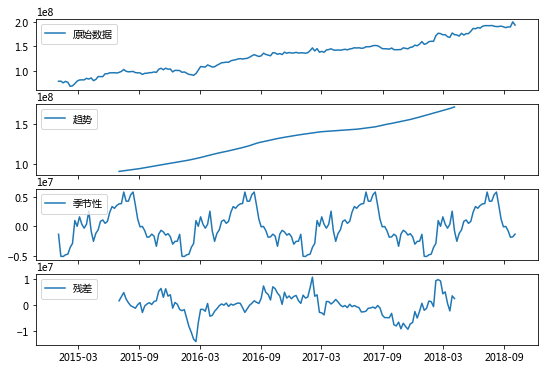

In [128]:
df_new = get_trend(df[2015], './Lisa/out_test.csv')

In [129]:
df_new.head(40)

,original,trend,seasonal,residual
week,,,,
2015-01-01,7.796271e+07,NaN,-1.350781e+06,NaN
2015-01-08,7.814163e+07,NaN,-5.063786e+06,NaN
2015-01-15,7.475313e+07,NaN,-5.098433e+06,NaN
2015-01-22,7.768612e+07,NaN,-4.811431e+06,NaN
2015-01-29,7.580416e+07,NaN,-4.704614e+06,NaN
2015-02-05,6.758971e+07,NaN,-3.568003e+06,NaN
2015-02-12,6.860601e+07,NaN,-2.887783e+06,NaN
2015-02-19,7.305630e+07,NaN,9.763899e+05,NaN
2015-02-26,7.830167e+07,NaN,3.646006e+03,NaN
